# Estructuras de Programación en R

Los bucles son implementados de la misma manera que en otros lenguajes de programación es decir `for, while, repeat`  funcionan en R, pero existe otras  alternativas para evitar los bucles.

## El bucle for

La sintaxis  para el bucle `for` es 

```
for (names in values ) expression
```

El bucle `for`, iteraciona a través de los componentes `names` de `values` uno a la vez. `names` toma el valor de cada elemento sucesivo de `values`, hasta que  se complete sus componentes. El bucle `for` puede ser usado con lista y vectores.

In [1]:
i <- c(1:5)
for (n in i) print (n * 10)

[1] 10
[1] 20
[1] 30
[1] 40
[1] 50


In [2]:
lenguajes <- c("Python", "JS", "C", "C++", "R", "Bash")
for(l in lenguajes){
  print(l)
}

[1] "Python"
[1] "JS"
[1] "C"
[1] "C++"
[1] "R"
[1] "Bash"


In [3]:
# Comparando la velocidad de un bucle for con una version vectorizada

n = 1000000
x=0
system.time(for (i in 1:n) x = sin(i/n))

i = 1:n # vectorizado
system.time(sin(i/n))


   user  system elapsed 
   0.86    0.00    0.86 

   user  system elapsed 
  0.104   0.000   0.104 

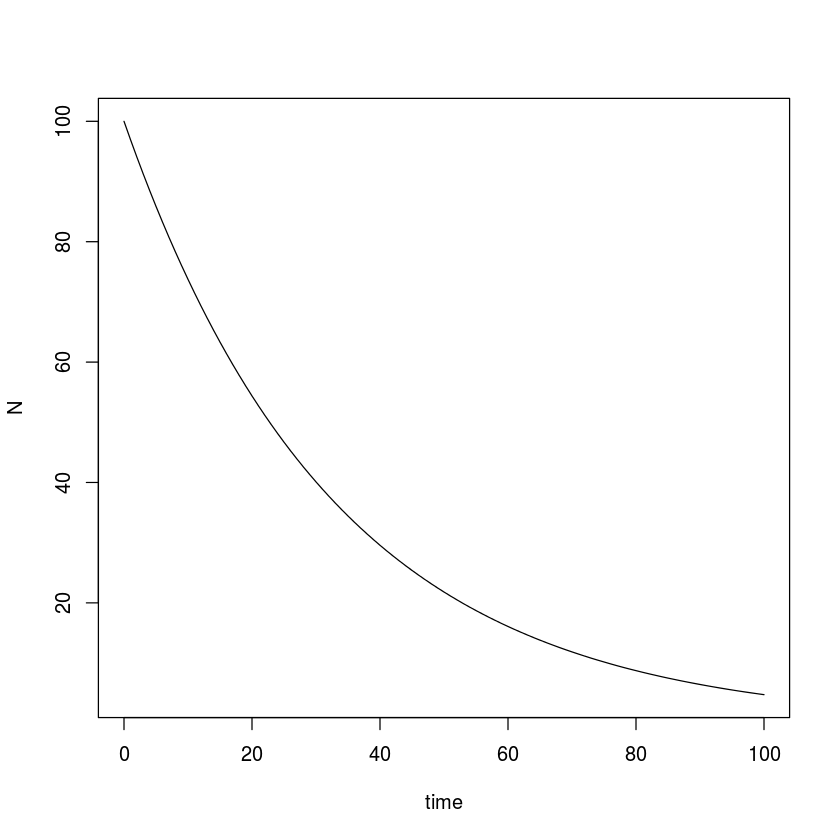

In [4]:
# Una simulación de decaimiento radioactivo

# Condiciones iniciales y definicion de variables 

tmin = 0; tmax = 100; dt = 1
n = (tmax - tmin)/dt + 1 
time = seq(tmin, tmax, by = dt)
k = .03 #  Tasa constante de decaimiento
N0 = 100 # Numero inicial de atomos
N = N0 

# Corremos el bucle
for (i in 2:n) {
  dN = -k*N[i-1]*dt
  N[i] = N[i-1] + dN}

# Mostramos un grafico

plot(time, N, type = "l")

## El bucle while

Para utilizar este bucles de manera eficaz, a menudo debemos suministrar una condición de verificación que permite detener la ejecución, o que haga un alto con una declaración `break` o `next`.

In [5]:
i <- 0
while (i < 14){
  i <- i + 2
  print(i)
}

[1] 2
[1] 4
[1] 6
[1] 8
[1] 10
[1] 12
[1] 14


In [6]:
# Un camino aleatorio con While

x=0
n=0
set.seed(333)
while (x <= 10) {
  n=n+1
  x=x+rnorm(1,mean=.5,sd=1)
  }

print(paste ("n = ", n, ", x = ",round(x,2) )) 

[1] "n =  26 , x =  11.05"


## El bucle repeat

La declaración debe incluir un test que determine cuando salir del bucle. Se puede detener un bucle `repeat` con una sentencia `break`.

In [7]:
i<- 1
repeat{
  print(i)
  i <- i +1
  if(i > 5)
    {break}
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [8]:
# Camino aleatorio usando repeat

x=0
n=0
set.seed(333)
repeat {
  n=n+1
  dx=rnorm(1,mean=0.5,sd=1)
  if (dx < -1) next # Rechazamos pasos negativos
  x=x+dx
  if (x > 10) break
  }
print(paste ("n = ", n, ", x = ",round(x,2) ))

[1] "n =  19 , x =  10.55"


## Ejemplos

- [Método de Acceptance-Rejection](http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf)

In [9]:
n <- 1000
    k <- 0      #contador para accepted(aceptado)
    j <- 0      #iteraciones
    y <- numeric(n)

    while (k < n) {
        u <- runif(1)
        j <- j + 1
        x <- runif(1)  
        if (x * (1-x) > u) {
            # Aceptamos  x
            k <- k + 1
            y[k] <- x
        }
    }

    j

    #comparamos  percentiles

    p <- seq(.1, .9, .1)
    Qhat <- quantile(y, p)   # cuantiles de muestra 
    Q <- qbeta(p, 2, 2)      # cuantiles teoricos
    se <- sqrt(p * (1-p) / (n * dbeta(Q, 2, 2)^2)) 
    round(rbind(Qhat, Q, se), 3)

[1] 6121

,10%,20%,30%,40%,50%,60%,70%,80%,90%
Qhat,0.190,0.276,0.360,0.440,0.503,0.579,0.643,0.717,0.812
Q,0.196,0.287,0.363,0.433,0.500,0.567,0.637,0.713,0.804
se,0.010,0.010,0.010,0.011,0.011,0.011,0.010,0.010,0.010


-  [Resolviendo `f(x) = 0`](https://en.wikipedia.org/wiki/Bisection_method)

In [10]:
f <- function(y, a, n) {
        a^2 + y^2 + 2*a*y/(n-1) - (n-2)
    }

    a <- 0.5
    n <- 20
    b0 <- 0
    b1 <- 5*n

    #resolviendo por el metodo de la biseccion

    it <- 0
    eps <- .Machine$double.eps^0.25
    r <- seq(b0, b1, length=3)
    y <- c(f(r[1], a, n), f(r[2], a, n), f(r[3], a, n))
    if (y[1] * y[3] > 0)
        stop("f no tiene signos opuestos en los puntos finales")

    while(it < 1000 && abs(y[2]) > eps) {
        it <- it + 1
        if (y[1]*y[2] < 0) {
            r[3] <- r[2]
            y[3] <- y[2]
        } else {
            r[1] <- r[2]
            y[1] <- y[2]
        }
        r[2] <- (r[1] + r[3]) / 2
        y[2] <- f(r[2], a=a, n=n)
        print(c(r[1], y[1], y[3]-y[2]))
    }

[1]    0.000  -17.750 1876.316
[1]   0.0000 -17.7500 469.4079
[1]   0.0000 -17.7500 117.5164
[1]   0.00000 -17.75000  29.46135
[1]  3.125000 -7.819901 17.172081
[1]  3.125000 -7.819901  6.754986
[1]  3.906250 -2.285619  3.530081
[1]  3.906250 -2.285619  1.650599
[1]  4.1015625 -0.7113133  0.8348365
[1]  4.1015625 -0.7113133  0.4102657
[1]  4.1503906 -0.3058160  0.2057289
[1]  4.1748047 -0.1012793  0.1030135
[1]  4.17480469 -0.10127926  0.05139497
[1]  4.1809082 -0.0499588  0.0257068
[1]  4.18395996 -0.02427063  0.01285573
[1]  4.185485840 -0.011419556  0.006428445
[1]  4.186248779 -0.004992275  0.003214368
[1]  4.186630249 -0.001778197  0.001607221
[1]  4.1868209839 -0.0001710497  0.0008036194
[1]  4.1868209839 -0.0001710497  0.0004018029
[1]  4.1868209839 -0.0001710497  0.0002008997


- [Caminos Aleatorios](https://en.wikipedia.org/wiki/Random_walk) 

[1] 1.42

[1] 9.699714

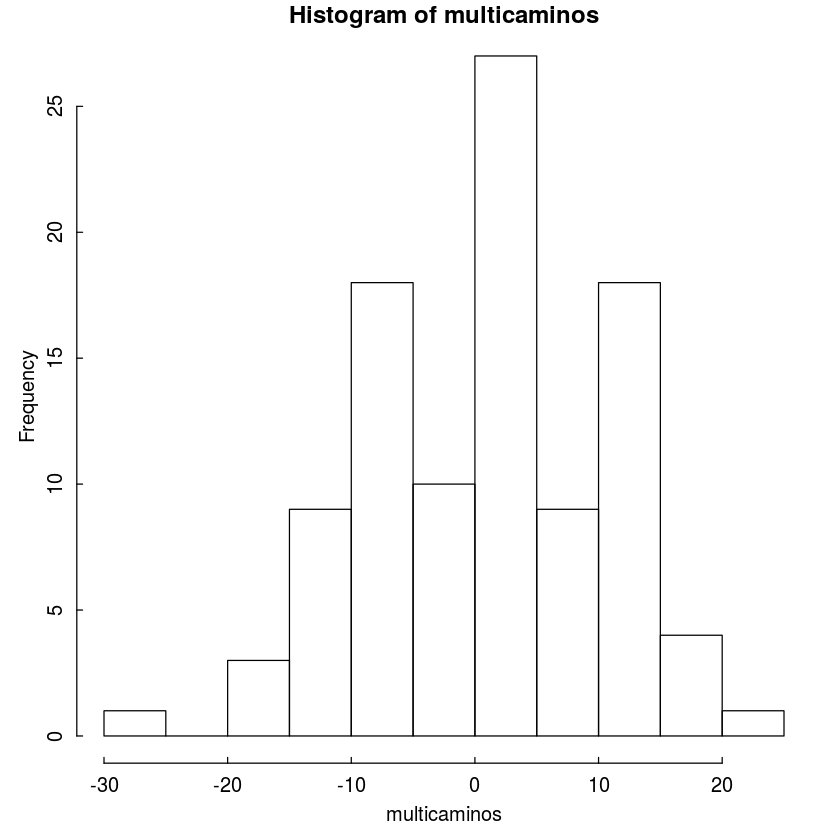

In [11]:
 # Camino aleatorio 1-dim con longitud de paso constante(lento)

camino_aleatorio = function(N) {
	camino = rep(0,N+1)
	for (i in 2:(N+1)) {
		x = runif(1)
		if (x <= 0.5) camino[i] = camino[i-1]-1 else camino[i] = camino[i-1]+1
	}
	return(camino[N])
}

multicaminos = c()
for (k in 1:100) {
	multicaminos[k] = camino_aleatorio(100)
}
mean(multicaminos)
sd(multicaminos)
par(mar=c(4,4,1.5,1.5),mex=.8,mgp=c(2,.5,0),tcl=0.3) 
hist(multicaminos)

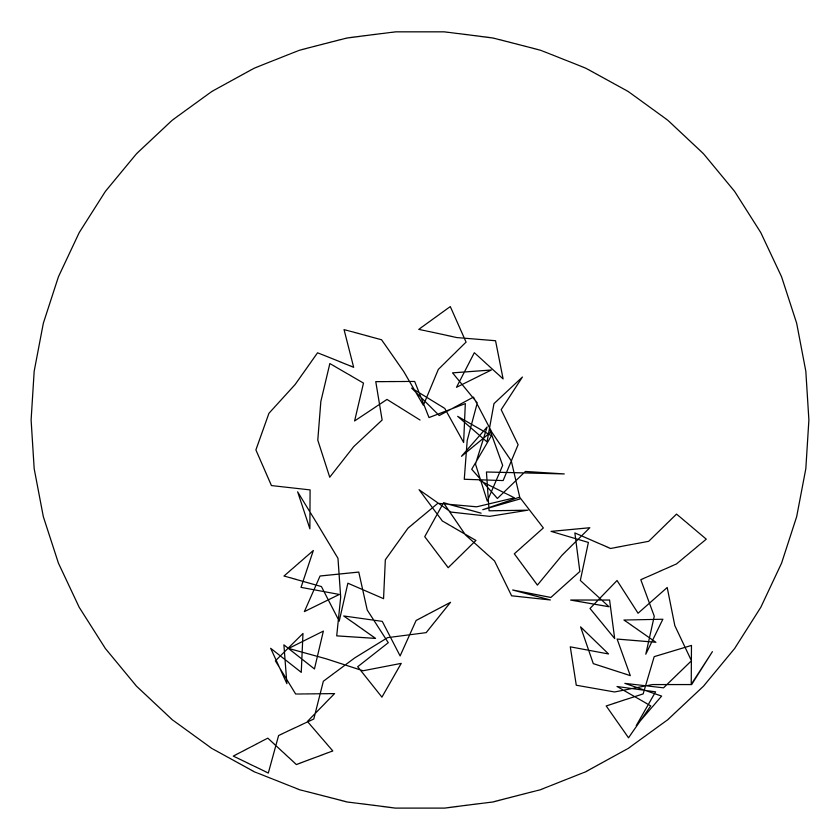

In [12]:
# Camino aleatorio 2D encerrado en un dominio circular

Rmax = 10
N = 200
coordenadas = matrix(nrow=N+1,ncol=2)
coordenadas[1,1] = coordenadas[1,2] = 0
dosPi = 2*pi
for (i in 2:(N+1)) {
	Rprueba = 1.1*Rmax
	while (Rprueba > Rmax) {
		xo = coordenadas[i-1,1]
		yo = coordenadas[i-1,2]
		theta = runif(1,-dosPi,dosPi)
		pasox = cos(theta)
		pasoy = sin(theta)
		x1 = xo + pasox
		y1 = yo + pasoy
		R = sqrt(x1^2 + y1^2) 
		if (R < Rmax) Rprueba = R
	}
coordenadas[i,1] = coordenadas[i-1,1] + pasox
coordenadas[i,2] = coordenadas[i-1,2] + pasoy
}

plot.new()
par(mar=c(0,0,0,0)) 
plot.window(c(-Rmax,Rmax), c(-Rmax,Rmax), asp=1,bty="n")
polygon(Rmax*cos(2*pi*(0:50/50)), Rmax*sin(2*pi*(0:50/50)))
lines(coordenadas[,1],coordenadas[,2])

# Entornos en R 

La función  de un entorno es asociar o enlazar un conjunto de nombres a un conjunto de valores. Se puede pensar en los entornos como una bolsa de nombres.

![](bn.png)

Cada nombre apunta a un objeto almacenado en otro lugar de la memoria.

In [13]:
e <- new.env()
e$a <- FALSE
e$b <- "a"
e$c <- 2.3
e$d <- 1:3

![](bn1.png)

Los objetos no viven en los entornos, así múltiples nombres pueden apuntar al mismo objeto.

In [14]:
e$a <- e$d
e$a

[1] 1 2 3

![](bn2.png)

Confusamente también pueden apuntar a diferentes objetos que tienen el mismo valor:



In [15]:
e$a <- 1:3

![](bn3.png)

Si un objeto no tiene un nombre que lo apunta, es eliminado automáticamente por el recolector de basura.

Cada entorno tiene un 'padre', otro entorno. En los diagramas, se va a representar el puntero al entorno 'padre' con un pequeño círculo negro. El entorno 'padre' se utiliza para implementar ámbito léxico: si un nombre no se encuentra en un entorno, entonces R  verá en el entorno 'padre' (y así sucesivamente). Sólo un entorno no tiene un 'padre': el entorno vacío.

![](bn4.png)


Generalmente, un entorno es similar a una lista, con cuatro excepciones importantes:

- Cada objeto en un entorno tiene un único nombre.
- Cada objeto en un entorno no es ordenado.
- Cada entorno tiene un 'parent (padre)'.
- Los entornos tienen [referencias semánticas](https://en.wikipedia.org/wiki/Reference_%28computer_science%29).

Hay cuatro especiales entornos:


- El `globalenv()` o entorno global, es donde se trabaja habitualmente. El 'padre' de `globalenv()` es el último paquete que se ha conectado con `library()` o `require()`.
- El `baseenv()` o el entorno base, es el entorno del paquete base. 'padre' es el entorno vacío.
- El `emptyenv()` o el entorno vacío, es el único entorno sin padre.
- `environment()` es el actual entorno.


`search()`  enumera todos los padres del entorno global. Esto se conoce como la ruta de búsqueda porque los objetos en estos entornos  se pueden encontrar desde el espacio de trabajo interactivo más alto. Contiene un único entorno para cada paquete adjunto y cualquier otro objeto que  tengas que `attach()`. También contiene un entorno especial llamado `Autoloads` que se utiliza para guardar memoria para  cargar objetos de paquete (como grandes conjuntos de datos) cuando sea necesario.

Se puede acceder a cualquier entorno en la lista de búsqueda usando `as.environment()`.

In [16]:
search()

as.environment("package:stats")

[1] ".GlobalEnv"        "package:stats"     "package:graphics" 
[4] "package:grDevices" "package:utils"     "package:datasets" 
[7] "package:methods"   "Autoloads"         "package:base"

<environment: package:stats>
attr(,"name")
[1] "package:stats"
attr(,"path")
[1] "/usr/lib/R/library/stats"

`globalenv()`, `baseenv()`, los entornos en la ruta de búsqueda, y `emptyenv()` están conectados como se muestra a continuación. Cada vez que se carga un nuevo paquete con `library()` se inserta entre el entorno global y el paquete que estaba previamente en la parte superior de la ruta de búsqueda.

![](b5.png)

Para crear un entorno manualmente, usamos `new.env()`. Puede listar los enlaces en el marco del entorno  con `ls()` y ver su entorno `padre` con `parent.env()`.

In [17]:
e <- new.env()
parent.env(e)
ls(e)

<environment: R_GlobalEnv>

character(0)

La forma más fácil de modificar los enlaces  en un entorno es tratarlo como una lista:

In [18]:
e$a <- 1
e$b <- 2
ls(e)
e$a

[1] "a" "b"

[1] 1

Por defecto, `ls()` sólo muestra los nombres que no empiecen con `..` Utiliza `all.names = TRUE` para mostrar todos los enlaces en un entorno

In [19]:
e$.a <- 2
ls(e)
ls(e, all.names = TRUE)

[1] "a" "b"

[1] "a"  ".a" "b"

Otra forma útil de ver un entorno es con `ls.str()`. Es más útil que `str()`, ya que muestra cada objeto en el entorno. Como `ls()`, también tiene un argumento `all.names`.

In [20]:
str(e)
ls.str(e)

<environment: 0xb425c80> 


a :  num 1
b :  num 2

Dado un nombre, puede extraer el valor al que está vinculado con `$, [[`, o `get()`:

- `$` y  `[[` miran  solamente en el entorno y devuelven  `NULL` si no hay un enlace  asociado con el nombre.
- `get()` utiliza las reglas de alcance(scoping)  y lanza un error si no se encuentra el enlace.

In [21]:
e$c <- 3
e$c
e[["c"]]
get("c", envir = e)

[1] 3

[1] 3

[1] 3

La eliminación de objetos en los  entornos funciona un poco diferente a las listas. Con una lista se puede quitar una entrada estableciéndola con  NULL. En los entornos, que va a crear un enlace a NULL. En su lugar usamos, `rm()` para eliminar el enlace.

In [22]:
e <- new.env()

e$a <- 1
e$a <- NULL
ls(e)


rm("a", envir = e)
ls(e)

[1] "a"

character(0)

Puede determinar si existe un enlace  en un entorno usamos `exist()`. Como `get()`, su comportamiento predeterminado es seguir las reglas de ámbitos (alcances) regulares y buscar en los entornos de los `padres`. Si no queremos este comportamiento, agregamos el argumento `inherits = FALSE:`

In [23]:
x <- 10
exists("x", envir = e)
exists("x", envir = e, inherits = FALSE)

[1] TRUE

[1] FALSE

Para comparar entornos, usamos `identical()` y no `==:`

In [24]:
identical(globalenv(), environment())
globalenv() == environment()

[1] TRUE

ERROR: Error in globalenv() == environment(): comparación  (1) es posible solo para tipos lista y atómico


## Recursión  sobre entornos

Los entornos  forman un árbol, por lo que es a menudo conveniente escribir una función recursiva.  Para esto utilicemos `pryr::where()` ([Información del paquet pryr](http://plyr.had.co.nz/)). Dado un nombre, `where()` encuentra el entorno  donde se define ese nombre, usando reglas de ámbito regulares de R:

In [25]:
x <- 5
where("x")
where("mean")

ERROR: Error in eval(expr, envir, enclos): no se pudo encontrar la función "where"


ERROR: Error in eval(expr, envir, enclos): no se pudo encontrar la función "where"


La definición de `where()` es sencillo. Tiene dos argumentos: el nombre a buscar (como una cadena), y el entorno en el que se inicia la búsqueda. [El código fuente se encuentra aquí](https://github.com/hadley/pryr).

In [26]:
where <- function(name, env = parent.frame()) {
  stopifnot(is.character(name), length(name) == 1)
  env <- to_env(env)

  if (identical(env, emptyenv())) {
    stop("Can't find ", name, call. = FALSE)
  }

  if (exists(name, env, inherits = FALSE)) {
    env
  } else {
    where(name, parent.env(env))
  }
}

Hay tres casos:

- El caso base: hemos alcanzado el entorno  vacío y no hemos  encontrado el enlace . No podemos ir más lejos, lo que generará un error.
- Exito: el nombre existe en este entorno, por lo que volvemos al entorno.
- El caso recursivo: el nombre no se encuentra en este entorno, así que probamos  en el entorno padre.

Es más fácil ver lo que está pasando con un ejemplo. Imagina que tienes dos entornos como en el siguiente diagrama:

![](bn6.png)

- Si estamos buscando  `a`, `where()`, debe encontrarla  en el primer entorno.
- Si estás buscando `b`, que no está en el primer entorno, `where()` deberá  buscar en el entorno  padre y encontrarlo allí.
- Si lo que buscas es `c`, que  no está en el primer entorno, o en el segundo entorno, entonces   `where()` alcanza el entorno vacío y lanza un error.

Es natural para trabajar con entornos de forma recursiva, por lo que `where()` proporciona un modelo útil.  La extracción de los detalles de `where()` muestra la estructura más claramente:

In [27]:
f <- function(..., env = parent.frame()) {
  if (identical(env, emptyenv())) {
    # base
  } else if (success) {
    # exito
  } else {
    # recursivo
    f(..., env = parent.env(env))
  }
}

## Iteración y Recursión

Es posible utilizar un bucle en lugar de usar recursión. Esto podría hacer que la ejecución pueda correr un poco más rápido (porque eliminamos algunas llamadas de función), pero no es tan recomendable,  porque puede que te resulte más fácil ver lo que está pasando si estas inclusive  menos familiarizado con funciones recursivas.

In [28]:
entorno<- function(x) identical(x, emptyenv())

f2 <- function(..., env = parent.frame()) {
  while(!entorno(env)) {
    if (success) {
      # exito
      return()
    }
    # inspeccionamos el entorno padre
    env <- parent.env(env)
  }

  # base 
}

##  Entornos de función

La mayoría de los entornos no son creados con `new.env()` sino que se crean por  la utilización de funciones. Existen  cuatro tipos de entornos asociados con  una función: **enclosing**, **binding**, **execution** y **calling**.

El entorno **enclosing**  es el entorno en el que se creó la función. Cada función tiene uno y sólo uno entorno **enclosing**. Para los otros tres tipos de entorno, pueden haber 0, 1, o muchos entornos asociados con cada función:

- El enlace  de una función a un nombre con <- define un entorno **binding**.
- Llamar a una función crea un entorno de ejecución (execution) efímero que almacena variables creadas durante la ejecución.
- Cada entorno de ejecución se asocia con un entorno de la llamada (calling), que te dice donde  la función fue llamada.

### El entorno Enclosing

Cuando se crea una función, se  gana una referencia al entorno donde se hizo esto. Este es el  entorno enclosing y es usado por el  ámbito léxico. Se  puede determinar el entorno que rodea de una función llamando a `environment()` con una función como primer argumento:

In [29]:
y <- 1
f <- function(x) x + y
environment(f)

<environment: R_GlobalEnv>

En los diagramas,  se describe las funciones como rectángulos redondeados. El entorno enclosing (que rodea) de una función está dada por un pequeño círculo negro:

![](bn7.png)

### Entorno Binding

El diagrama anterior es demasiado simple, porque las funciones no tienen nombres. En cambio, el nombre de una función se define por un enlace. Los entornos binding  de una función son todos los entornos que tienen un enlace  a la función. El siguiente diagrama refleja mejor esta relación porque entorno enclosing contiene un enlace  de f a la función:

![](bn8.png)

En este caso los entornos enclosing y binding son los mismos. Ellos son diferentes si tu asignas una función en un entorno diferente.

In [30]:
e <- new.env()
e$g <- function() 1

![](bn9.png)

El entorno enclosing  pertenece a la función, y no cambia, incluso si la función se mueve a un entorno diferente. El entorno enclosing determina cómo la función encuentra valores; los entornos binding  determinan cómo se encuentra a la función.

La distinción entre los entornos binding  y enclosing  es importante para los espacios de nombres de paquetes. Espacios de nombres del paquete mantienen paquetes independientes. Por ejemplo, si el paquete A utiliza la función base `mean()`, ¿qué pasa si el paquete B crea su propia función  `mean()`?.  Los espacios de nombres aseguran  que el paquete A continue utilizando la función base `mean()`, y que el paquete A, no se vea afectado por el paquete B.

Los espacios de nombres se implementan utilizando entornos, aprovechando el hecho de que las funciones no tienen que vivir en sus entornos enclosing. Por ejemplo, sea la   función base `sd()`. Los entornos enclosing y binding son diferentes:

```
environment(sd)
<environment: namespace:stats>
where("sd")
<environment: package:stats>
```

La definición de `sd()` utiliza `var()`, pero si hacemos nuestra propia versión de `var()` no afecta a `sd()`:

In [31]:
x <- 1:10
sd(x)
var <- function(x, na.rm = TRUE) 100
sd(x)

[1] 3.02765

[1] 3.02765

Esto funciona porque cada paquete tiene dos entornos  asociados: el entorno *package* y el entorno *namespace*. El entorno *package* contiene todas las funciones de acceso público, y se coloca en la ruta de búsqueda. El entorno *namespace*  contiene todas las funciones (incluyendo las funciones internas), y  su entorno de  parientes es un entorno especial de importaciones que contiene enlaces  a todas las funciones que el paquete necesita. Cada función exportada en un paquete se vincula en el  entorno *package*, pero encerrada   por el  entorno *namespace*. Esta complicada relación se ilustra por el siguiente diagrama:

![](bn10.png)

Cuando escribimos `var` en la consola, se encuentra primero en el entorno global. Cuando `sd()` busca `var()` y lo encuentra en el entorno de espacio de nombres, por lo que nunca se ve en `globalenv()`.

## Entorno de Ejecución

¿Qué devolverá la  siguiente función  la primera vez que se ejecuta? ¿Y la segunda?


In [32]:
g <- function(x) {
  if (!exists("a", inherits = FALSE)) {
    message("Definiendo a")
    a <- 1
  } else {
    a <- a + 1
  }
  a
}
g(10)
g(10)

Definiendo a


[1] 1

Definiendo a


[1] 1

Cada vez que una función se llama, se crea un nuevo entorno para realizar la ejecución. El padre del entorno de ejecución es el entorno enclosing  de la función. Una vez que la función se ha completado, este entorno es desechado.

Dibujemos el entorno de ejecución, con una función que esta rodeado de puntos

```
h <- function(x) {
  a <- 2
  x + a
}
y <- h(1)
```

![](bn11.png)



Cuando se crea una función dentro de otra función, el entorno enclosing de la función `niño` es el entorno de ejecución de los padres y el entorno de ejecución ya no se desecha. El siguiente ejemplo ilustra esta idea con una función, `plus()`. Utilizamos esto  para crear una función llamada `plus_one()`. El entorno que encierra a  `plus_one()` es el entorno de ejecución de `plus()` donde x está enlazada al valor 1.

In [33]:
plus <- function(x) {
  function(y) x + y
}
plus_one <- plus(1)
identical(parent.env(environment(plus_one)), environment(plus))

[1] TRUE

![](bn12.png)

## Entorno Calling

Mira el siguiente código. ¿Qué devuelve `i()` cuando se ejecuta el código?


In [34]:
h <- function() {
  x <- 10
  function() {
    x
  }
}
i <- h()
x <- 20
i()

[1] 10

La x de nivel superior (enlazado a 20) es una pista falsa: usando las reglas de ámbito regulares, `h()`  encuentra donde está definido y encuentra que el valor asociado con x es 10. Sin embargo, sigue siendo importante  preguntar qué valor de x está asociado con  el entorno cuando  `i()` se llama: x es 10 en el entorno en el que se define `h()`, pero es 20 en el entorno donde  `h()` es llamado .

Podemos acceder a este entorno mediante la función `parent.frame()`. Esta función devuelve el entorno en el que la función fue llamada. También podemos utilizar esta función para buscar los valores de nombres en ese entorno:

In [35]:
f2 <- function() {
  x <- 10
  function() {
    def <- get("x", environment())
    cll <- get("x", parent.frame())
    list(defined = def, called = cll)
  }
}
g2 <- f2()
x <- 20
str(g2())

List of 2
 $ defined: num 10
 $ called : num 20


En los escenarios más complicados, no hay sólo una llamada de los padres, sino una secuencia de llamadas que llevan todo el camino de regreso a la función de inicio, llamada desde el nivel superior. El código siguiente genera una pila de llamadas con tres niveles de profundidad. Las flechas abiertas representan el entorno calling  de cada entorno de ejecución.

In [36]:
x <- 0
y <- 10
f <- function() {
  x <- 1
  g()
}
g <- function() {
  x <- 2
  h()
}
h <- function() {
  x <- 3
  x + y
}
f()

[1] 13

![](bn13.png)


Buscando variables en el entorno de llamada, en lugar del entorno enclosing es llamado **alcance dinámico**. Pocos lenguajes implementan el alcance dinámico (Emacs Lisp es un excepción [alcance dinámico en Lisp](http://www.gnu.org/software/emacs/emacs-paper.html#SEC15)). Esto se debe a que alcance dinámico hace que sea mucho más difícil de razonar acerca de cómo funciona una función: no sólo se  necesita saber cómo se define, sino que también es necesario saber en qué contexto fue llamaba. De alcance dinámico es principalmente útil para el desarrollo de funciones que ayudan a análisis de datos interactivo.  

# Funciones 

In [37]:
f <- function(x) {
    x^2 + 1 
    }
f
formals(f)
body(f)
environment(f)

function(x) {
    x^2 + 1 
    }

$x



{
    x^2 + 1
}

<environment: R_GlobalEnv>

Funciones Primitivas 

In [38]:
sum
formals(sum)
body(sum)
environment(sum)

function (..., na.rm = FALSE)  .Primitive("sum")

NULL

NULL

NULL

Ambito Léxico

In [39]:
f <- function() {
  x <- 1
  y <- 2
  c(x, y)
}
f()
rm(f)

[1] 1 2

In [40]:
x <- 2
g <- function() {
  y <- 1
  c(x, y)
}
g()
rm(x, g)

[1] 2 1

In [41]:
x <- 1
h <- function() {
  y <- 2
  i <- function() {
    z <- 3
    c(x, y, z)
  }
  i()
}
h()
rm(x, h)

[1] 1 2 3

In [42]:
j <- function(x) {
  y <- 2
  function() {
    c(x, y)
  }
}
k <- j(1)
k()
rm(j, k)

[1] 1 2

## Funciones y variables

In [43]:
l <- function(x) x + 1
m <- function() {
  l <- function(x) x * 2
  l(10)
}
m()
rm(l, m)

[1] 20

In [44]:
n <- function(x) x / 2
o <- function() {
  n <- 10
  n(n)
}
o()
    rm(n,o)

[1] 5

In [45]:
# Interesante

j <- function() {
  if (!exists("a")) {
    a <- 1
  } else {
    a <- a + 1
  }
  print(a)
}
j()
rm(j)

[1] 1.5


In [46]:
f <- function() x
x <- 15
f()
    x<- 20
    f()

[1] 15

[1] 20

In [47]:
f <- function() x + 1
codetools::findGlobals(f)

[1] "+" "x"

In [48]:
environment(f) <- emptyenv()
f()

ERROR: Error in f(): no se pudo encontrar la función "+"


In [49]:
`(` <- function(e1) {
  if (is.numeric(e1) && runif(1) < 0.1) {
    e1 + 1
  } else {
    e1
  }
}
replicate(50, (1 + 2))
  rm("(")

[1] 3 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 4 3 4 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

# Cada operación es una llamada de función

In [50]:
x <- 10; y <- 5
x + y
`+`(x, y)


for (i in 1:2) print(i)
`for`(i, 1:2, print(i))


if (i == 1) print("R!") else print("Node.js.")
`if`(i == 1, print("R!"), print("Node.js."))


x[3]
`[`(x, 3)

{ print(1); print(2); print(3) }
`{`(print(1), print(2), print(3))


[1] 15

[1] 15

[1] 1
[1] 2
[1] 1
[1] 2
[1] "Node.js."
[1] "Node.js."


[1] NA

[1] NA

[1] 1
[1] 2
[1] 3
[1] 1
[1] 2
[1] 3


In [51]:
suma <- function(x, y) x + y
sapply(1:10, suma, 3)

[1]  4  5  6  7  8  9 10 11 12 13

In [52]:
sapply(1:5, `+`, 3)
sapply(1:5, "+", 3)

[1] 4 5 6 7 8

[1] 4 5 6 7 8

In [53]:
x <- list(1:3, 4:9, 10:12)
sapply(x, "[", 2)
sapply(x, function(x) x[2])

[1]  2  5 11

[1]  2  5 11

In [54]:
## Llamando funciones

f <- function(abcdef, bcde1, bcde2) {
  list(a = abcdef, b1 = bcde1, b2 = bcde2)
}
str(f(1, 2, 3))

str(f(2, 3, abcdef = 1))

str(f(2, 3, a = 1))

str(f(1, 3, b = 1))


List of 3
 $ a : num 1
 $ b1: num 2
 $ b2: num 3
List of 3
 $ a : num 1
 $ b1: num 2
 $ b2: num 3
List of 3
 $ a : num 1
 $ b1: num 2
 $ b2: num 3


ERROR: Error in f(1, 3, b = 1): el argumento 3 concuerda con multiples argumentos formales


In [55]:
args <- list(1:10, na.rm = TRUE)
do.call(mean, list(1:10, na.rm = TRUE))

mean(1:10, na.rm = TRUE)

[1] 5.5

[1] 5.5

In [56]:
f <- function(a = 1, b = 2) {
  c(a, b)
}
f()

[1] 1 2

In [57]:
g <- function(a = 1, b = a * 2) {
  c(a, b)
}
g()
g(10)

[1] 1 2

[1] 10 20

In [58]:
h <- function(a = 1, b = d) {
  d <- (a + 1) ^ 2
  c(a, b)
}
h()
h(5)

[1] 1 4

[1]  5 36

In [59]:
i <- function(a, b) {
  c(missing(a), missing(b))
}
i()
i(a = 1)
i(b = 2)
i(1, 2)

[1] TRUE TRUE

[1] FALSE  TRUE

[1]  TRUE FALSE

[1] FALSE FALSE

## Evaluación Lazy

In [60]:
f <- function(x) {
  10
}
f(stop("Error!"))

[1] 10

In [61]:
f <- function(x) {
  force(x)
  10
}
f(stop("Error!"))

ERROR: Error in force(x): Error!


In [62]:
suma <- function(x) {
  function(y) x + y
}
suma1 <- lapply(1:10, suma)
suma1[[1]](10)
suma1[[10]](10)

[1] 11

[1] 20

In [63]:
suma <- function(x) {
  force(x)
  function(y) x + y
}
suma2 <- lapply(1:10, suma)
suma2[[1]](10)
suma2[[10]](10)

[1] 11

[1] 20

In [64]:
f <- function(x = ls()) {
  a <- 1
  x
}
f()
f(ls())

[1] "a" "x"

[1] "a"                "A"                "args"             "b0"              
 [5] "b1"               "beta"             "camino_aleatorio" "coordenadas"     
 [9] "diag"             "dN"               "dosPi"            "dt"              
[13] "dx"               "e"                "entorno"          "eps"             
[17] "exito"            "f"                "f2"               "g"               
[21] "g2"               "h"                "hanoi"            "hypot"           
[25] "i"                "it"               "len1"             "lenguajes"       
[29] "multicaminos"     "N"                "N0"               "p"               
[33] "pasox"            "pasoy"            "plus"             "plus_one"        
[37] "prueba"           "Q"                "Qhat"             "r"               
[41] "R"                "Rmax"             "Rprueba"          "s"               
[45] "se"               "simlista"         "sinh"             "slope"           
[49] "suma"             "suma1"            "suma2"            "theta"           
[53] "time"             "tmax"             "tmin"             "u"               
[57] "var"              "w"                "where"            "x"               
[61] "x1"               "xo"               "y"                "y1"              
[65] "yo"               "z"

In [65]:
x <- NULL
if (!is.null(x) && x > 0) {

}

In [66]:
`&&` <- function(x, y) {
  if (!x) return(FALSE)
  if (!y) return(FALSE)

  TRUE
}
a <- NULL
!is.null(a) && a > 0

[1] FALSE